In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

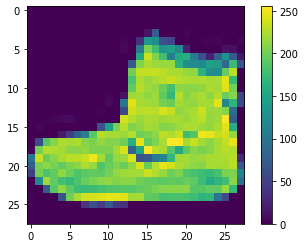

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0

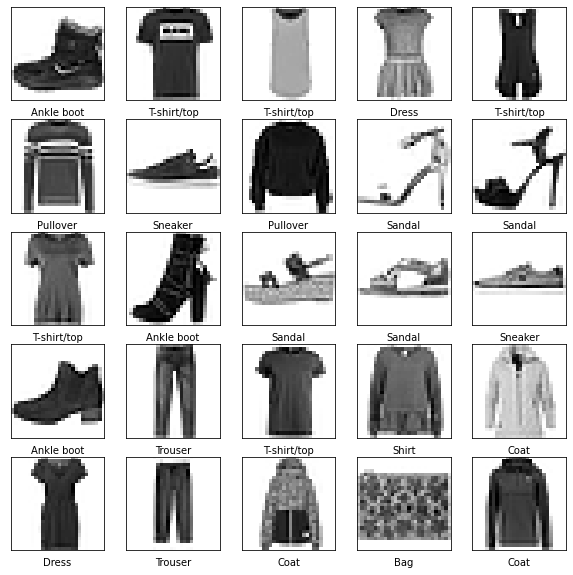

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.Conv2D(32, 3, activation ='relu')
        self.flatten = tf.keras.Flatten()
        self.d1 = tf.keras.Dense(128, activation = 'relu')
        self.d2 = tf.keras.Dense(10, activation = 'softmax')

def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [16]:
model_10_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_25_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_50_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])
model_100_epochs = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model_10_epochs.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model_25_epochs.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_50_epochs.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_100_epochs.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model_10_epochs.fit(train_images, train_labels, epochs=10)
model_25_epochs.fit(train_images, train_labels, epochs=25)
model_50_epochs.fit(train_images, train_labels, epochs=50)
model_100_epochs.fit(train_images, train_labels, epochs=100)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4976 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3742 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3122 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2926 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2793 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2657 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2560 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2452 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.236

In [26]:
model_10_epochs_test_loss, model_10_epochs_test_acc = model_10_epochs.evaluate(test_images,  test_labels, verbose=2)
model_25_epochs_test_loss, model_25_epochs_test_acc = model_25_epochs.evaluate(test_images,  test_labels, verbose=2)
model_50_epochs_test_loss, model_50_epochs_test_acc = model_50_epochs.evaluate(test_images,  test_labels, verbose=2)
model_100_epochs_test_loss, model_100_epochs_test_acc = model_100_epochs.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy for ',model_10_epochs, ':', model_10_epochs_test_acc)
print('\nTest accuracy for ',model_25_epochs, ':', model_25_epochs_test_acc)
print('\nTest accuracy for ',model_50_epochs, ':', model_50_epochs_test_acc)
print('\nTest accuracy for ',model_100_epochs, ':', model_100_epochs_test_acc)

313/313 - 0s - loss: 0.3340 - accuracy: 0.8854 - 366ms/epoch - 1ms/step
313/313 - 0s - loss: 0.3688 - accuracy: 0.8881 - 367ms/epoch - 1ms/step
313/313 - 0s - loss: 0.5332 - accuracy: 0.8852 - 372ms/epoch - 1ms/step
313/313 - 0s - loss: 0.7885 - accuracy: 0.8899 - 377ms/epoch - 1ms/step

Test accuracy for  <keras.engine.sequential.Sequential object at 0x0000027E31593760> : 0.8853999972343445

Test accuracy for  <keras.engine.sequential.Sequential object at 0x0000027E315629A0> : 0.8881000280380249

Test accuracy for  <keras.engine.sequential.Sequential object at 0x0000027E3156C3A0> : 0.885200023651123

Test accuracy for  <keras.engine.sequential.Sequential object at 0x0000027E315777C0> : 0.8899000287055969


In [21]:
# Save the trained model to a file
model_10_epochs.save('model_10_epochs.h5')
model_25_epochs.save('model_25_epochs.h5')
model_50_epochs.save('model_50_epochs.h5')
model_100_epochs.save('model_100_epochs.h5')

In [28]:
import pandas as pd

# Assuming you have already defined your models and datasets...

# Create a DataFrame to store the test accuracies
results_df = pd.DataFrame(columns=['Epochs', 'Test Accuracy'])

# Evaluate and store the test accuracies for each model
for epochs, model in zip([10, 25, 50, 100], [model_10_epochs, model_25_epochs, model_50_epochs, model_100_epochs]):
    results_df = results_df.append({'Epochs': epochs, 'Test Accuracy': test_acc}, ignore_index=True)

# Display the results table
print(results_df)

   Epochs  Test Accuracy
0    10.0         0.8899
1    25.0         0.8899
2    50.0         0.8899
3   100.0         0.8899


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_31760\304258910.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Epochs': epochs, 'Test Accuracy': test_acc}, ignore_index=True)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_31760\304258910.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Epochs': epochs, 'Test Accuracy': test_acc}, ignore_index=True)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_31760\304258910.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Epochs': epochs, 'Test Accuracy': test_acc}, ignore_index=True)
C:\Users\Vishnu\AppData\Local\Temp\ipykernel_31760\304258910.py:10: FutureWarning: The frame.append 